# **<font color = "red">** **CreditCard_Fraude_Detection**

**Se tiene una serie de transacciones, la fecha, cantidad y clase.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv("/content/drive/MyDrive/Proyectos/Proyecto_Credit_Card_Fraude_Detection/train.csv")
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [4]:
# Para tener un pequeño resumen de las variables y los tipos de datos que tenemos en el dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [5]:
train["Time"].unique

<bound method Series.unique of 0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
            ...   
219124    120580.0
219125    120580.0
219126    120580.0
219127    120580.0
219128    120580.0
Name: Time, Length: 219129, dtype: float64>

**Eliminamos a la columna ID, ya que no nos aporta relevancia al modelo**


In [6]:
train.drop("id", axis = 1, inplace = True)

In [7]:
train.shape

(219129, 31)

In [8]:
# Como todas las variables son númericas, vamos a tener un panorama con la función describe()
train.iloc[:,:10].describe(include= "all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337
std,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143
min,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951
25%,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444
50%,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323
75%,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715
max,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914


In [9]:
train.iloc[:,10:20].describe()

,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302
std,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928
min,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628
25%,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035
50%,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935
75%,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718
max,15.878405,9.417789,5.406614,5.976265,6.078453,4.693323,5.834992,8.845303,4.847887,4.090974


In [10]:
train.iloc[:,20:].describe()

,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


<Axes: >

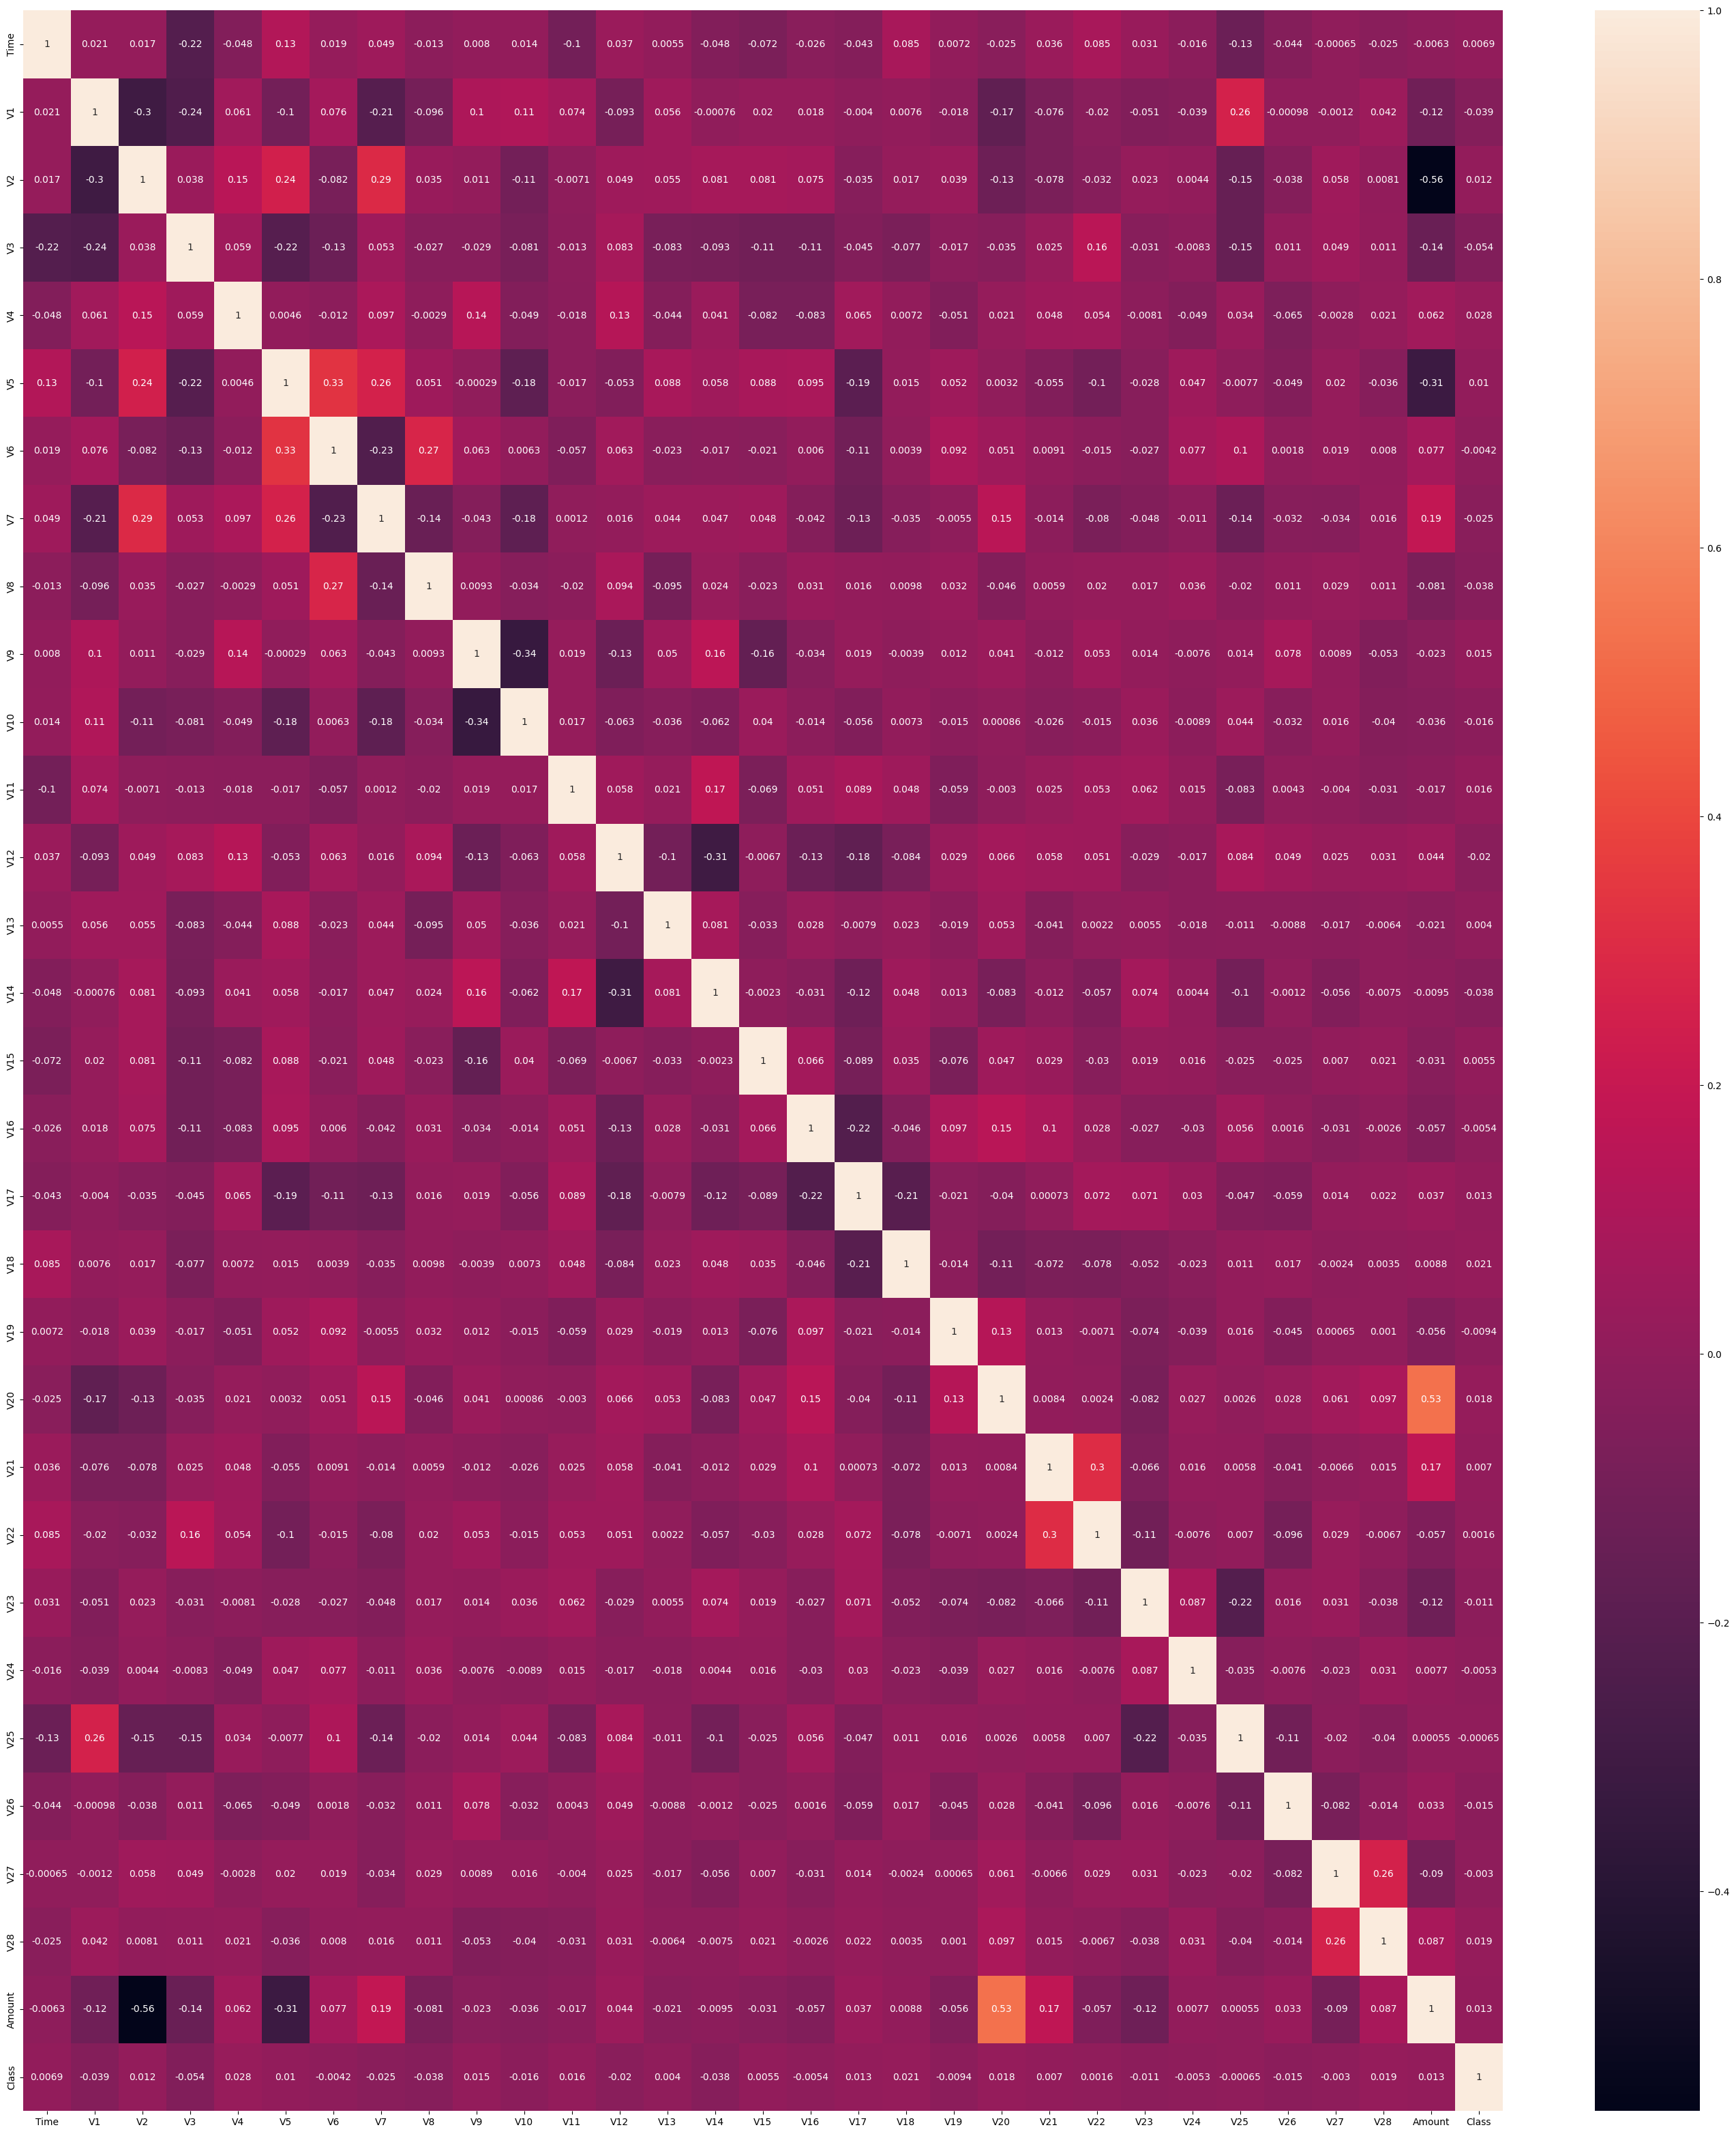

In [11]:
plt.figure(figsize=(35,40))
sns.heatmap(train.corr(),annot = True)

**Las variables que tienen correlaciones positivas son las siguientes**

* V20 vs Amount con un 0.53 de correlación

**Las variables que tienen correlaciones negativas son las siguientes**

* V2 vs Amount con un -0.56

<Axes: xlabel='Class', ylabel='count'>

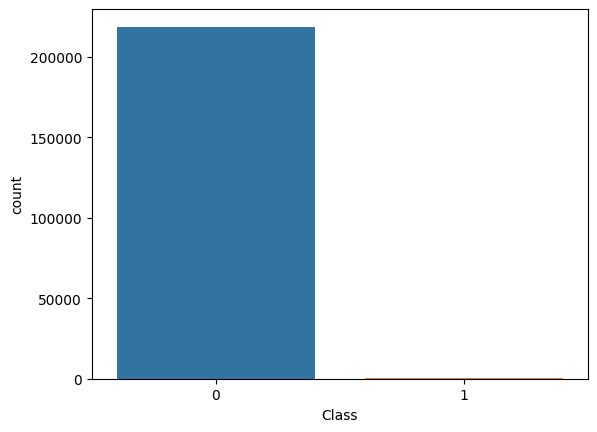

In [12]:
sns.countplot(data=train, x = train["Class"])

In [13]:
train["Class"].value_counts(normalize = True)

0    0.99786
1    0.00214
Name: Class, dtype: float64

Como podemos observar hay un problema en la cantidad de muestras de interés de fraude de tarjeta(menos del 1%) y las que no, en este caso se tendrá que hacer tecnica de balanceo, ya que la gran proporción de los que no son fraude puede restar precisión y aumentar la distorsionidad al modelo.

<font color = "gold"> **OJO**

Como se observa, se ve que tenemos un problema de desequilibrio de clases binaria, es decir una distribución desigual extrema. En pocas palabras al ser minoritaria una clase con la otra, el modelo lo entendera que es un ruido y lo ignorara que provocara sesgo en el modelo. Es preferible realizar un **Sobremuestreo** que el **Submuestreo**, para este problema se va a utilizar **SMOTE**.

**Explicación grafica**

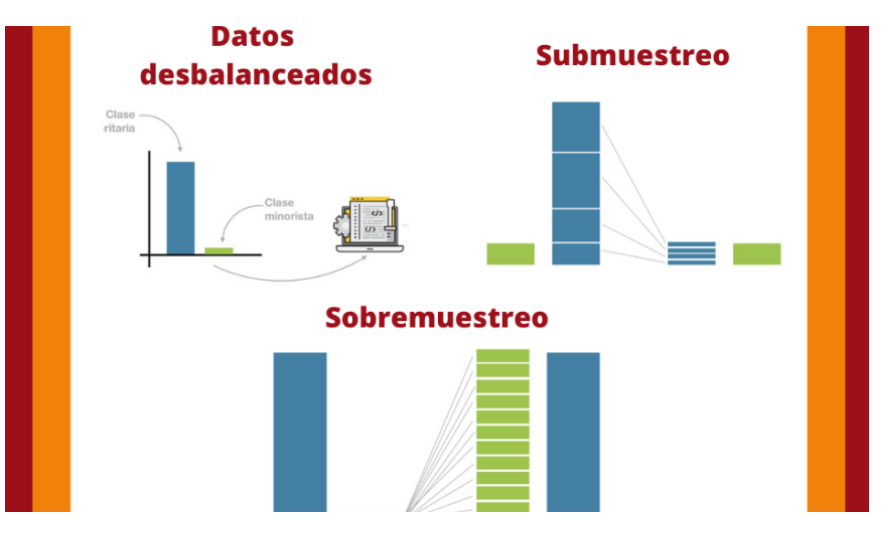

# <font color = "electric"> **SMOTE**

* Es una tecnica de sobremuestreo o oversampling en las que se crean nuevas observaciones sintecticas utilizando la muestra minoritaria.

* Genera registro de entrenamiento virtual por interpolación lineal para la clase minoritaria.

* Después de todo este proceso, los datos se reconstruye listo para aplicar cualquier modelo de clasificación para los datos procesados.

# <font color = "electric"> **¿Cómo funciona SMOTE?**

El SMOTE lo que hace es seleccionar muestras de la clase minoritaria y luego traza una recta. Los puntos que se encuentra en la recta son las nuevas muestras. La elección de las muestras es aleatoria y luego se usa un algoritmo conocido que se llama KNN para seleccionar a los vecinos, luego se traza rectas.
El unico inconveniente sería que las muestras sintéticas se crean sin consultar a la clase mayoritaria, lo que ocasionaria en muestras superpuestas en ambas clases.

# <font color = "purple"> **Preparación de la data para el modelo de Machine Learning**

In [14]:
# importamos las librerias y los paquetes a utilizar
from sklearn.model_selection import train_test_split # este modulo proporciona una función para dividir un conjunto de datos en conjunto de entrenamiento y prueba.
from sklearn.model_selection import cross_val_score # Para realizar validación cruzada, para evaluar el rendimiento del modelo que consiste en dividir los datos en particiones, entranando y evaluadno el modelo en diferentes combinaciones de estas particiones.
from sklearn.model_selection import GridSearchCV # Permite buscar los mejores hiperparametros del modelo y realiza una validación cruzada
from sklearn.utils.class_weight import compute_class_weight # Calcula automaticamente los pesos de clase en problema de clasificación desequilibrio
from sklearn.preprocessing import MinMaxScaler # Se utiliza para escalar los datos en un rango especifico.


Asignamos la variable independiente y la dependiente

In [15]:
X = train.drop(["Class"], axis = "columns") # Todas las columnas excepto, la variable Class
y = train["Class"] # Solo la variable Class

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1997) # Stratify garantiza que las etiquetas de prueba sea similar a la distribución de las etiquetas de entrenamiento es perfecto cuando exista
# desequilibrio de clases de datos y se desea preservar esa proporción en ambos conjuntos.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175303, 30), (43826, 30), (175303,), (43826,))

In [17]:
print(pd.DataFrame(X_train))

            Time        V1        V2        V3        V4        V5        V6  \
146636   73188.0  1.170199 -0.737333  0.566189 -0.896814 -1.163515 -0.355537   
22827    33261.0  0.992541 -0.958480  0.247724 -1.358077 -0.739482  0.461777   
132405   69556.0 -0.957990 -4.088959  0.097534  0.463969 -2.566012  1.244779   
72096    53182.0  1.007692 -1.091729  0.290859 -0.487550 -1.135847  0.232365   
206681  110908.0 -1.532538  0.071739  1.123941  1.151859 -0.026956  0.065078   
...          ...       ...       ...       ...       ...       ...       ...   
44393    43815.0  1.396949 -0.708026  0.744281 -0.737997 -1.086333  0.017119   
14668    20784.0  1.041718 -0.037477 -0.182889  1.060177 -0.154833 -0.164419   
76614    54256.0  1.006712 -0.828879 -0.163476  0.454801  1.472659  4.622752   
201629   97900.0  1.867442 -0.064100  0.536089  4.062851 -0.171568  1.301166   
40138    40586.0  1.045178 -0.287801  1.493780  0.746263 -1.292929 -0.053516   

              V7        V8        V9  .

# <font color = "sky blue"> **Escalamiento**

Como se observo, existe variables que a comparación de las otras son demasiados altos, como es la variable **Amount**,lo que implicaria que haya problemas al momento de utilizar ciertos modelos que utilicen la distancia como KNN.

In [71]:
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc

array([[4.49668270e-01, 8.96066878e-01, 7.47841478e-01, ...,
        4.06656895e-01, 1.63069388e-01, 1.03010033e-04],
       [4.37216850e-01, 8.74802289e-01, 7.24080209e-01, ...,
        4.22770576e-01, 1.65518465e-01, 1.91292744e-03],
       [9.60420550e-01, 9.65542736e-01, 7.47986433e-01, ...,
        4.12254418e-01, 1.59711414e-01, 1.06494953e-04],
       ...,
       [5.72997180e-01, 8.89160158e-01, 7.32525655e-01, ...,
        4.12266948e-01, 1.65135488e-01, 2.00668896e-03],
       [4.05838448e-01, 8.87639210e-01, 7.44756100e-01, ...,
        4.17312780e-01, 1.63518674e-01, 1.33779264e-04],
       [6.86556643e-01, 8.85183099e-01, 7.21559104e-01, ...,
        4.09545608e-01, 1.66532345e-01, 6.04682274e-02]])

In [19]:
X_test_sc = scaler.fit_transform(X_test)
X_test_sc

array([[6.20476033e-01, 9.46113716e-01, 6.79017382e-01, ...,
        5.66768025e-01, 6.18120704e-01, 1.38177743e-03],
       [5.11701775e-01, 8.82964072e-01, 7.12833392e-01, ...,
        5.66831523e-01, 6.16480797e-01, 6.14123301e-03],
       [3.23022060e-01, 8.71338400e-01, 6.99072399e-01, ...,
        5.59985279e-01, 6.28227371e-01, 7.23130186e-04],
       ...,
       [4.33877923e-01, 7.54095336e-01, 6.77608366e-01, ...,
        5.33015523e-01, 4.77915160e-01, 1.21949534e-02],
       [6.14786863e-01, 9.36188602e-01, 6.68563712e-01, ...,
        5.61832494e-01, 6.18943584e-01, 2.97849801e-02],
       [6.12041798e-01, 8.84506515e-01, 7.09566286e-01, ...,
        5.48637201e-01, 5.98876251e-01, 7.67654126e-04]])

# **Machine Learning sin SMOTE y sin tratar el desbalanceo de datos**

Para comprobar la gran efectividad en estos casos, haremos un modelo sin realizar SMOTE.

**RandomForestClassifier**

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

Definimos un diccionario de varios modelos que vamos a utilizar para probar, comparar y seleccionar el mejor modelo.

In [21]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000000000),
    'SGD Classifier': SGDClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=10000000)
}
models

{'Logistic Regression': LogisticRegression(max_iter=10000000000),
 'SGD Classifier': SGDClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'GaussianNB': GaussianNB(),
 'MultinomialNB': MultinomialNB(),
 'KNeighbors': KNeighborsClassifier(),
 'Neural Network': MLPClassifier(max_iter=10000000)}

In [22]:
# Para proporcionar una información detallada en precisión y rendimiento de los modelos se necesita
from sklearn.metrics import classification_report

In [23]:
for key,model in models.items():
    model.fit(X_train_sc,y_train)
    predictions = model.predict(X_test_sc)
    print('Reporte de clasificación',key)
    print(classification_report(y_test,predictions,zero_division = 0))

Reporte de clasificación Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43732
           1       0.00      0.00      0.00        94

    accuracy                           1.00     43826
   macro avg       0.50      0.50      0.50     43826
weighted avg       1.00      1.00      1.00     43826

Reporte de clasificación SGD Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43732
           1       0.00      0.00      0.00        94

    accuracy                           1.00     43826
   macro avg       0.50      0.50      0.50     43826
weighted avg       1.00      1.00      1.00     43826

Reporte de clasificación Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43732
           1       0.04      0.03      0.04        94

    accuracy                           1.00     43826
   m

**Como podemos observar los modelos tiene una precisión de casi 100% y en la mayoria el recall tiene 0, esto quiere decir que en los datos de tarjetas clonadas no lo identifica bien por la representatividad que tiene a comparación de la clase mayoritaria, por ende este modelo . NO VAAA!!!**

# <font color = "blue electric"> **¿SMOTE o SMOTEENN?**

Ya se explico el SMOTE, ahora recordando que uno de los inconvenientes de este modelo es que la muestra sintetica pueda estar superpuestas de la clase mayoritaria o que esten en áreas de espacios no realistas,solapen con otras clases, lo que podría afectar en la generalización de del modelo.

**SMOTEENN**

Lo que hace es primero aplicar SMOTE y luego ENN(EDITED NEAREST NEIGHBORS) es decir, por cada ejemplo en el conjunto de datos, se identifica sus k vecinos más cercanos utilizando una métrica, por ejemplo, distancia Euclidiana.

Se compara la clase de ejemplo con la de sus vecinos y si la mayoría de vecinos pertenece a la clase mayoritaria, se le considera ruidoso o mal clasificado.

Estos elementos ruidosos o mal clasificados se eliminan del conjunto de datos.
Todo esto permite mejorar la precisión del modelo, como también corrige los errores de clasificación y por ultimo reduce el sesgo que produce la clase mayoritaria, equilibrando conjuntos.

**Notas**

* El valor que se les asigne a K puede influir en los resultados de ENN. Un K pequeño puede ser más sensible al ruido, pero un K mayor puede ser muy discriminador.

* El K demanda demasiados recursos computacionales como tiempo y más aún en dataset grandes, es por ello que se recomienda ser juicioso al momento de elegir el valor de K.

# <font color = "green electric"> **Modelo con SMOTE**

#**CORREGIR GRAFICO NO MAS**

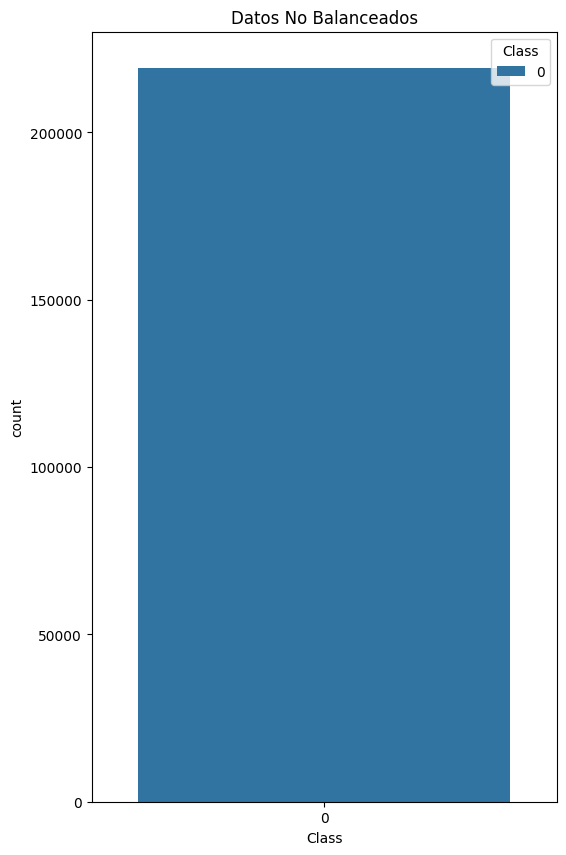

In [24]:
plt.figure(figsize=(6, 10))
sns.countplot(data=y, x=y, hue=y)
plt.title("Datos No Balanceados")

# Ajustar ancho de las barras para que sean más visibles
plt.bar_width = 0.35

plt.show()



In [25]:
# primero instalamos la biblioteca
!pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1997)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'Cambio de X antes de SMOTE: {X.shape}, Cambio de X después de SMOTE: {X_sm.shape}')

print('Balance de las clases :')
print(y_sm.value_counts(normalize = True))

Cambio de X antes de SMOTE: (219129, 30), Cambio de X después de SMOTE: (437320, 30)
Balance de las clases :
0    0.5
1    0.5
Name: Class, dtype: float64


**Como se pudo observar hay una mejora en la distribución  de los datos ocasionados por el SMOTE, que definitivamente va a mejorar en la predicción de la tarjetas fraudulentas, que ya no lo va tomar como un sesgo o ruido**

#**CORREGIR GRAFICO NO MAS**

<Figure size 640x480 with 0 Axes>

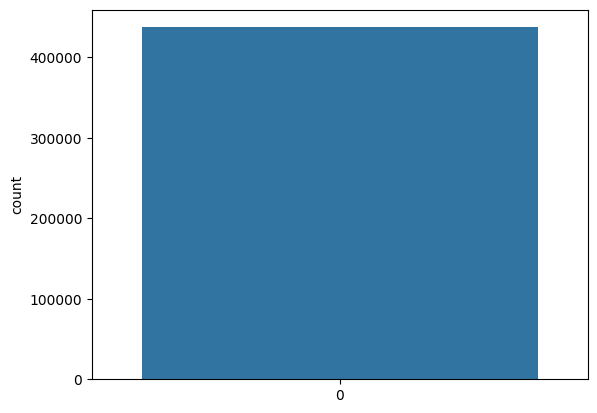

<Figure size 640x480 with 0 Axes>

In [27]:
sns.countplot(y_sm)
plt.figure("Datos Balanceados")

In [28]:
y_sm.value_counts(normalize = True)

0    0.5
1    0.5
Name: Class, dtype: float64

**Hacemos todo el procedimiento de partir la data en train y test, pero ahora con X_sm e y_sm**

In [29]:
# Dividimos nuestra base de datos a entrenamiento y prueba, es igual que se hizo sin SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, stratify= y_sm, random_state = 1997)

In [30]:
print(X_train)

                 Time        V1        V2        V3        V4        V5  \
195124   88569.000000 -0.943568  1.823705 -0.885065 -0.883668  0.535969   
249414   79709.304739  0.284092  0.164069  1.432872  0.037781 -0.400732   
51523    46852.000000  1.145544  0.014714  0.418378  1.231840 -0.028627   
374903   17259.214303 -1.538916  1.595830  1.397047  1.271506 -0.194963   
434421     833.295918  0.527187 -0.392156  0.260107 -0.187352 -0.315456   
...               ...       ...       ...       ...       ...       ...   
36812    39097.000000 -0.448914 -0.506816  1.817160 -1.967778 -0.793867   
406275   56399.297551 -1.574742  0.719075  1.567541 -1.305349  0.172653   
9123      9192.000000  1.216788 -0.947667  1.082925 -1.056646 -1.402755   
50035    46360.000000  1.212498 -0.271627 -0.113824 -0.483869  0.373918   
387368  109854.689998  0.830474  2.146883 -1.099649  4.750659 -0.075163   

              V6        V7        V8        V9  ...       V20       V21  \
195124 -0.566378  0.9606

**De la misma forma escalamos los datos.**

In [31]:
scaler = MinMaxScaler()

X_train_sc_sm = scaler.fit_transform(X_train)
X_train_sc_sm

array([[7.34524797e-01, 8.95339700e-01, 7.63832544e-01, ...,
        4.40121580e-01, 1.77195134e-01, 1.31505017e-03],
       [6.61049135e-01, 9.33420582e-01, 7.36317033e-01, ...,
        4.14305073e-01, 1.62177883e-01, 1.33779264e-04],
       [3.88555316e-01, 9.60142031e-01, 7.33840851e-01, ...,
        4.14439122e-01, 1.64111737e-01, 1.33779264e-04],
       ...,
       [7.62315475e-02, 9.62351964e-01, 7.17885300e-01, ...,
        4.14106351e-01, 1.64384732e-01, 4.90301003e-03],
       [3.84475037e-01, 9.62218875e-01, 7.29093529e-01, ...,
        4.10643007e-01, 1.63176104e-01, 4.68227425e-03],
       [9.11052330e-01, 9.50368852e-01, 7.69190600e-01, ...,
        4.15073374e-01, 1.62699147e-01, 1.86254614e-04]])

In [32]:
X_test_sc_sm = scaler.fit_transform(X_test)
X_test_sc_sm

array([[6.75391549e-01, 7.74956068e-01, 8.41446151e-01, ...,
        6.08927429e-01, 1.43889483e-01, 1.52083634e-04],
       [5.10565600e-01, 9.50000838e-01, 7.76983624e-01, ...,
        5.89488922e-01, 1.38103807e-01, 1.76560449e-03],
       [6.25095372e-01, 8.86344310e-01, 7.91820325e-01, ...,
        5.85686550e-01, 1.35485694e-01, 6.90735182e-03],
       ...,
       [4.46856859e-01, 8.58680130e-01, 7.96829446e-01, ...,
        6.04011489e-01, 1.40678298e-01, 5.22004806e-03],
       [7.76774803e-01, 8.31152738e-01, 8.38705233e-01, ...,
        6.03588705e-01, 1.43338108e-01, 7.49784976e-04],
       [4.64546073e-01, 9.17140241e-01, 7.88482853e-01, ...,
        5.91044808e-01, 1.38415407e-01, 1.42479956e-04]])

In [33]:
for key,model in models.items():
    model.fit(X_train_sc_sm,y_train)
    predictions = model.predict(X_test_sc_sm)
    print('Reporte de clasificación',key)
    print(classification_report(y_test,predictions,zero_division = 0))

Reporte de clasificación Logistic Regression
              precision    recall  f1-score   support

           0       0.56      0.99      0.72     43732
           1       0.97      0.22      0.36     43732

    accuracy                           0.61     87464
   macro avg       0.77      0.61      0.54     87464
weighted avg       0.77      0.61      0.54     87464

Reporte de clasificación SGD Classifier
              precision    recall  f1-score   support

           0       0.69      0.93      0.79     43732
           1       0.89      0.57      0.70     43732

    accuracy                           0.75     87464
   macro avg       0.79      0.75      0.74     87464
weighted avg       0.79      0.75      0.74     87464

Reporte de clasificación Random Forest
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     43732
           1       1.00      0.00      0.00     43732

    accuracy                           0.50     87464
   m

**Como se puede observar los indicadores de los modelos han mejorado considerablemente ahora el trabajo sería de todos estos modelos tenemos que determinar  cuales son las mejores opciones, tenemos que considerar los siguientes indicadores : precisión , recall, f1-score en este caso tenemos estos 3 modelos**
* **SGD Classifier**: cuenta con precision del 90% en la clase 1; recall de unos 0.56, lo cual nos indica que tiene un 56% en el que el modelo identifica un fraude ; F1-score tiene 0.69 lo cual es una media equilibrada.
* **Gradient Boosting**: Precision 87%, recall 58%, f1-score de 0.7
* **KNeighbors**: Precision 95%, recall 0.78 y f1-score 0.85

# <font color = "gold"> **Modelo con SMOTEENN**



In [34]:
from imblearn.combine import SMOTEENN
from collections import Counter

**En este caso se va a utilizar SMOTEEN y compute_class_weigth que se utiliza en data desbalanceada**

Volvemos a dividir los datos desde el origen

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.2,random_state = 1997,stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175303, 30), (43826, 30), (175303,), (43826,))

In [75]:
smn = SMOTEENN()

In [76]:
X_train_smn, y_train_smn = smn.fit_resample(X_train,y_train)
X_train_smn.shape,y_train_smn

((319331, 30),
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 319326    1
 319327    1
 319328    1
 319329    1
 319330    1
 Name: Class, Length: 319331, dtype: int64)

Volvemos a escalar el entrenamiento con SMOTEENN

In [77]:
X_train_sc_smn = scaler.fit_transform(X_train_smn)
X_train_sc_smn

array([[4.49668270e-01, 8.96066878e-01, 7.47841478e-01, ...,
        4.06656895e-01, 1.63069388e-01, 1.03010033e-04],
       [6.42494609e-01, 8.71229567e-01, 7.64652939e-01, ...,
        4.08849289e-01, 1.59071120e-01, 1.60401338e-03],
       [3.63476530e-01, 9.56022752e-01, 7.28462495e-01, ...,
        4.15241018e-01, 1.65040445e-01, 2.11371237e-02],
       ...,
       [4.85007856e-01, 9.02651364e-01, 7.69254213e-01, ...,
        4.19357401e-01, 1.74377023e-01, 6.86101142e-03],
       [3.92188883e-01, 8.71630210e-01, 7.72368468e-01, ...,
        4.34929839e-01, 1.70480587e-01, 1.21340907e-04],
       [6.35410840e-01, 8.46754977e-01, 7.97956719e-01, ...,
        4.12209723e-01, 1.74512833e-01, 1.33779264e-04]])

In [78]:
X_test_sc_smn = scaler.fit_transform(X_test)
X_test_sc_smn

array([[7.27187882e-01, 8.93864216e-01, 7.49400671e-01, ...,
        6.44793667e-01, 1.72827645e-01, 1.23186801e-02],
       [1.98182562e-01, 9.19162402e-01, 7.47597021e-01, ...,
        6.43653779e-01, 1.62235100e-01, 1.70112871e-03],
       [5.99631618e-01, 9.51987814e-01, 7.29164187e-01, ...,
        6.46067274e-01, 1.62368482e-01, 8.93355863e-03],
       ...,
       [4.63858020e-01, 9.66101985e-01, 7.16172659e-01, ...,
        6.43902412e-01, 1.61988105e-01, 2.14143309e-03],
       [3.96636362e-01, 9.11536467e-01, 7.51361554e-01, ...,
        6.48303961e-01, 1.66065772e-01, 1.87942598e-04],
       [3.20998507e-01, 9.54490276e-01, 7.36131970e-01, ...,
        6.39450613e-01, 1.61649124e-01, 4.24003752e-04]])

In [42]:
# compute_class_weight permite calcular los pesos de clases balanceados para un problema de clasificación
# el parametro class_weight = "balanced" nos indica que se quiere calcular los pesos de clase balanceados
#classes se establece en np.unique(y_train_balanced), que representa las clases únicas presentes en el conjunto de datos objetivo.
class_weights2 = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_smn), y=y_train_smn)
class_weights2
#El resultado de esta operación es un array de pesos de clase balanceados, donde cada peso corresponde a una clase específica.
#Estos pesos se pueden utilizar luego al entrenar un modelo de clasificación para compensar el desequilibrio de clases y mejorar
#su rendimiento en la clasificación de las clases minoritarias.

array([1.07004481, 0.93856201])

In [43]:
Counter(y_train_smn)

Counter({0: 142159, 1: 162074})

In [44]:
y_train_smn.value_counts(normalize = True)

1    0.53273
0    0.46727
Name: Class, dtype: float64

Creamos un diccionario para posteriormente hacerlo entrenar con modelos

In [45]:
class_weights_dict2 = {}
for index, weight in enumerate(class_weights2):
    class_weights_dict2[index] = weight
class_weights_dict2

{0: 1.0700448089814925, 1: 0.9385620148820909}

Es el mismo diccionario de modelos solo que esta vez consideramos el class_weights

In [46]:
models2 = {
    'Logistic Regression': LogisticRegression(max_iter=10000000000, class_weight=class_weights_dict2),
    'SGD Classifier': SGDClassifier(class_weight=class_weights_dict2),
    'Random Forest': RandomForestClassifier(class_weight=class_weights_dict2),
    'Gradient Boosting': GradientBoostingClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=10000000)
}
models2

{'Logistic Regression': LogisticRegression(max_iter=10000000000),
 'SGD Classifier': SGDClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'GaussianNB': GaussianNB(),
 'MultinomialNB': MultinomialNB(),
 'KNeighbors': KNeighborsClassifier(),
 'Neural Network': MLPClassifier(max_iter=10000000)}

In [47]:
for key, model in models2.items():
    model.fit(X_train_sc_smn, y_train_smn)
    predictions = model.predict(X_test_sc_smn)
    print('Classification report for ', key)
    print(classification_report(y_test  , predictions, zero_division=0))

Classification report for  Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43732
           1       0.07      0.10      0.08        94

    accuracy                           1.00     43826
   macro avg       0.54      0.55      0.54     43826
weighted avg       1.00      1.00      1.00     43826

Classification report for  SGD Classifier
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     43732
           1       0.07      0.20      0.10        94

    accuracy                           0.99     43826
   macro avg       0.53      0.60      0.55     43826
weighted avg       1.00      0.99      0.99     43826

Classification report for  Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43732
           1       0.00      0.00      0.00        94

    accuracy                           1.00     4382

* **Logistic Regression**: Aunque su rendimiento en la detección de instancias positivas es bajo, tiene una alta precisión para las instancias negativas.

* **SGD Classifier**: Aunque su rendimiento en la detección de instancias positivas es limitado, muestra una mejora en comparación con Logistic Regression.

* **Gradient Boosting**: Aunque su rendimiento en la detección de instancias positivas sigue siendo bajo, muestra una mejora significativa en recall en comparación con los modelos anteriores.

#**Como podemos observar el metodo SMOTE fue mas eficiente a la hora de crear modelos, tiene mejores indicadores a comparación de su contraparte SMOTEENN**

**Realizando primero el SMOTTEEN antes de partir la data de entrenamiento a test**

In [48]:
X_smn, y_smn = smn.fit_resample(X, y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_smn, y_smn,test_size=0.2,random_state= 1997,stratify = y_smn)

In [50]:
Counter(y_train)

Counter({0: 144092, 1: 164089})

In [51]:
X_train_sc_smn2 = scaler.fit_transform(X_train)

In [52]:
X_test_sc_smn2 = scaler.fit_transform(X_test)

In [53]:
models3 = {
    'Logistic Regression': LogisticRegression(max_iter=10000000000, class_weight=class_weights_dict2),
    'SGD Classifier': SGDClassifier(class_weight=class_weights_dict2),
    'Random Forest': RandomForestClassifier(class_weight=class_weights_dict2),
    'Gradient Boosting': GradientBoostingClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=10000000)
}
models3

{'Logistic Regression': LogisticRegression(class_weight={0: 1.0700448089814925, 1: 0.9385620148820909},
                    max_iter=10000000000),
 'SGD Classifier': SGDClassifier(class_weight={0: 1.0700448089814925, 1: 0.9385620148820909}),
 'Random Forest': RandomForestClassifier(class_weight={0: 1.0700448089814925,
                                      1: 0.9385620148820909}),
 'Gradient Boosting': GradientBoostingClassifier(),
 'GaussianNB': GaussianNB(),
 'MultinomialNB': MultinomialNB(),
 'KNeighbors': KNeighborsClassifier(),
 'Neural Network': MLPClassifier(max_iter=10000000)}

In [54]:
for key, model in models3.items():
    model.fit(X_train_sc_smn2, y_train)
    predictions = model.predict(X_test_sc_smn2)
    print('Classification report for ', key)
    print(classification_report(y_test  , predictions, zero_division=0))

Classification report for  Logistic Regression
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     36023
           1       0.98      0.17      0.28     41023

    accuracy                           0.55     77046
   macro avg       0.75      0.58      0.48     77046
weighted avg       0.76      0.55      0.47     77046

Classification report for  SGD Classifier
              precision    recall  f1-score   support

           0       0.60      0.98      0.74     36023
           1       0.95      0.43      0.60     41023

    accuracy                           0.69     77046
   macro avg       0.78      0.70      0.67     77046
weighted avg       0.79      0.69      0.67     77046

Classification report for  Random Forest
              precision    recall  f1-score   support

           0       0.47      1.00      0.64     36023
           1       1.00      0.00      0.01     41023

    accuracy                           0.47     7704

# **<font color = "gold">** **Elección de los mejores modelos**

**Tras una comparación de los métodos utilizados, se comprueba que con SMOTE los modelos salen más confiables que serían**
* KNeighbors
* Gradient Boosting
* SGD Classifier

In [83]:
chosen_models = ['KNeighbors', 'SGD Classifier', 'Gradient Boosting']
chosen_models_dict = {}
for model_name in chosen_models:
    chosen_models_dict[model_name] = models2[model_name]
chosen_models_dict

{'KNeighbors': KNeighborsClassifier(),
 'SGD Classifier': SGDClassifier(class_weight={0: 1.0700448089814925, 1: 0.9385620148820909}),
 'Gradient Boosting': GradientBoostingClassifier()}

In [56]:
df_test = pd.read_csv('/content/drive/MyDrive/Proyectos/Proyecto_Credit_Card_Fraude_Detection/test.csv')
df_test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [62]:
X_unknown = df_test.drop(['id'], axis = 'columns')
X_unknown

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,-0.230126,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,1.068183,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,-1.177858,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,2.079398,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,-0.281749,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146082,172789.0,-0.661834,-0.622980,0.735580,-0.554067,0.869889,-0.389502,0.161226,0.069945,0.698829,...,0.262408,-0.046068,-0.425692,0.253833,-1.076331,-0.999877,0.161938,0.149243,0.279708,94.81
146083,172789.0,-0.098889,0.761900,0.340012,-0.589546,0.717091,-0.262765,0.726272,-0.070608,0.095958,...,0.064640,0.441215,1.284819,-0.141790,0.646930,-0.419964,-0.561426,0.326700,0.255166,24.99
146084,172789.0,-1.487918,1.769142,0.551671,0.361566,0.056347,0.084844,0.567545,-0.059899,0.331706,...,0.792736,0.163500,1.287079,-0.186955,-0.349847,-0.161724,-0.213933,0.392745,0.070938,29.99
146085,172790.0,-1.889979,-0.154869,0.068496,-1.906964,-1.743181,0.717490,0.981608,-0.209713,-0.556087,...,-0.513829,0.121457,0.764642,-0.217844,0.104599,-0.008906,-0.204957,-0.752326,-0.155728,314.00


In [79]:
X_unknown_sc = scaler.transform(X_unknown)

In [80]:
X_unknown_sc

array([[1.        , 0.98946991, 0.72188137, ..., 0.64195398, 0.16050451,
        0.00641359],
       [1.        , 0.97521615, 0.7054597 , ..., 0.64180802, 0.16364188,
        0.03501243],
       [1.        , 0.99292034, 0.70728476, ..., 0.64467458, 0.1599283 ,
        0.00342629],
       ...,
       [1.43298225, 0.85139625, 0.76271817, ..., 0.66903709, 0.16386815,
        0.00642216],
       [1.43299055, 0.83599039, 0.73079131, ..., 0.5891142 , 0.15565966,
        0.067241  ],
       [1.43299055, 0.98728474, 0.7089187 , ..., 0.64329334, 0.15966123,
        0.01477589]])

In [84]:
#Creamos un DF vacio para almacenar los resultados del modelo
df_predictions = pd.DataFrame()

In [85]:
for key, model in chosen_models_dict.items():
    predictions = model.predict(X_unknown_sc)
    df_predictions[key] = predictions
df_predictions.head()

,KNeighbors,SGD Classifier,Gradient Boosting
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [86]:
df_test_with_predictions = pd.concat([df_test, df_predictions], axis='columns')
df_test_with_predictions.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V23,V24,V25,V26,V27,V28,Amount,KNeighbors,SGD Classifier,Gradient Boosting
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95,0,0,0
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50,0,0,0
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00,0,0,0
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98,0,0,0
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98,0,0,0


In [87]:
for model_name in chosen_models:
    df = df_test_with_predictions[['id']]
    df['Class'] = df_test_with_predictions[model_name]
    df.to_csv(f'{model_name}.csv', index=False)
print('Save Completed')

<ipython-input-87-ee9652d602a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df_test_with_predictions[model_name]
<ipython-input-87-ee9652d602a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df_test_with_predictions[model_name]
<ipython-input-87-ee9652d602a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

Save Completed


In [95]:
SG = pd.read_csv('/content/SGD Classifier.csv')
SG

,id,Class
0,219129,0
1,219130,0
2,219131,0
3,219132,0
4,219133,0
...,...,...
146082,365211,0
146083,365212,0
146084,365213,0
146085,365214,0


**Se descargan las predicciones y se suben al desafio de Kaggle**